In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
import math
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from ipywidgets import interactive

# Load Dataset

In [150]:
dataset = pd.read_csv('datasets/IBM_Stock_Data.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [151]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

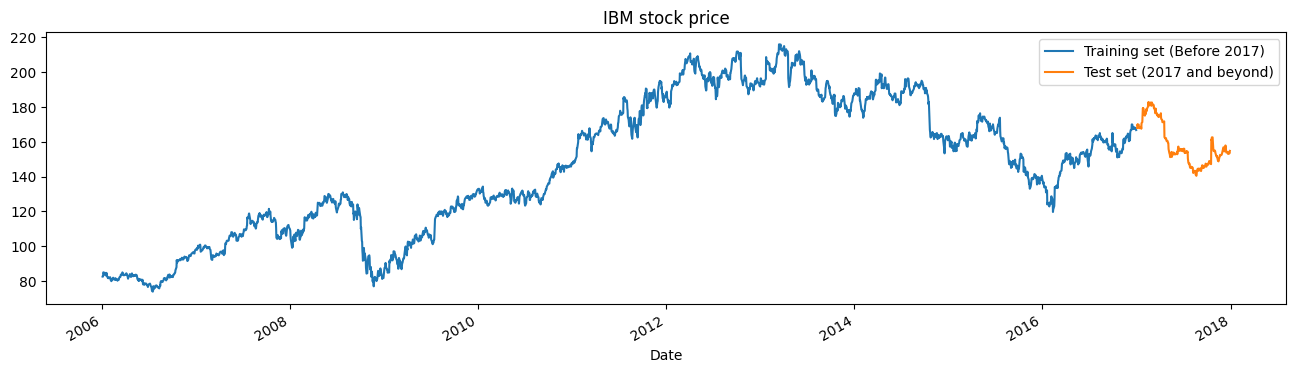

In [152]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [153]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [154]:
len(training_set_scaled)

2769

In [155]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [156]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [157]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# GRU

In [158]:
model_gru = Sequential()
model_gru.add(GRU(62, return_sequences=True, input_shape=X_train.shape[1:]))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(50, return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(50, return_sequences=False))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1, activation = "sigmoid"))
model_gru.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_gru.fit(X_train,y_train,epochs=15,batch_size=150)

Epoch 1/15
19/19 [==============================] - 4s 95ms/step - loss: 0.0526
Epoch 2/15
19/19 [==============================] - 2s 93ms/step - loss: 0.0056
Epoch 3/15
19/19 [==============================] - 2s 91ms/step - loss: 0.0027
Epoch 4/15
19/19 [==============================] - 2s 90ms/step - loss: 0.0020
Epoch 5/15
19/19 [==============================] - 2s 92ms/step - loss: 0.0019
Epoch 6/15
19/19 [==============================] - 2s 94ms/step - loss: 0.0017
Epoch 7/15
19/19 [==============================] - 2s 95ms/step - loss: 0.0017
Epoch 8/15
19/19 [==============================] - 2s 102ms/step - loss: 0.0016
Epoch 9/15
19/19 [==============================] - 2s 107ms/step - loss: 0.0017
Epoch 10/15
19/19 [==============================] - 2s 102ms/step - loss: 0.0017
Epoch 11/15
19/19 [==============================] - 2s 116ms/step - loss: 0.0016
Epoch 12/15
19/19 [==============================] - 2s 114ms/step - loss: 0.0016
Epoch 13/15
19/19 [=============

In [159]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [160]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = model_gru.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 0s 7ms/step


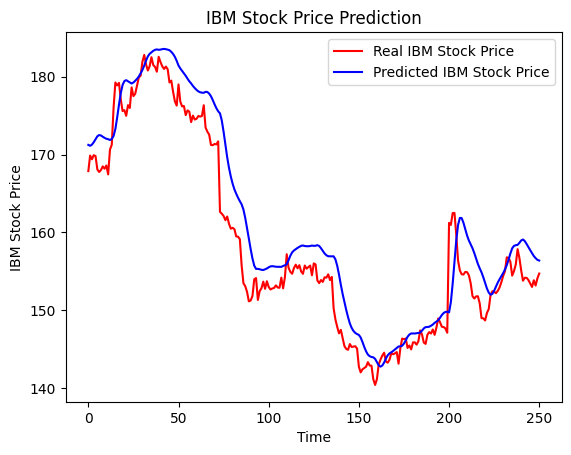

In [161]:
plot_predictions(test_set,predicted_stock_price)

In [162]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 4.0172206725101836.


# LSTM

In [163]:
model = Sequential()
model.add(LSTM(62, return_sequences=True, input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train,y_train,epochs=15,batch_size=150)

Epoch 1/15
19/19 [==============================] - 4s 115ms/step - loss: 0.0454
Epoch 2/15
19/19 [==============================] - 2s 117ms/step - loss: 0.0078
Epoch 3/15
19/19 [==============================] - 2s 111ms/step - loss: 0.0035
Epoch 4/15
19/19 [==============================] - 2s 108ms/step - loss: 0.0027
Epoch 5/15
19/19 [==============================] - 2s 106ms/step - loss: 0.0023
Epoch 6/15
19/19 [==============================] - 2s 110ms/step - loss: 0.0021
Epoch 7/15
19/19 [==============================] - 2s 110ms/step - loss: 0.0021
Epoch 8/15
19/19 [==============================] - 2s 109ms/step - loss: 0.0019
Epoch 9/15
19/19 [==============================] - 2s 109ms/step - loss: 0.0018
Epoch 10/15
19/19 [==============================] - 2s 109ms/step - loss: 0.0018
Epoch 11/15
19/19 [==============================] - 2s 118ms/step - loss: 0.0017
Epoch 12/15
19/19 [==============================] - 2s 111ms/step - loss: 0.0017
Epoch 13/15
19/19 [======

In [164]:
lstm_predicted_stock_price = model.predict(X_test)
lstm_predicted_stock_price = sc.inverse_transform(lstm_predicted_stock_price)

8/8 [==============================] - 1s 9ms/step


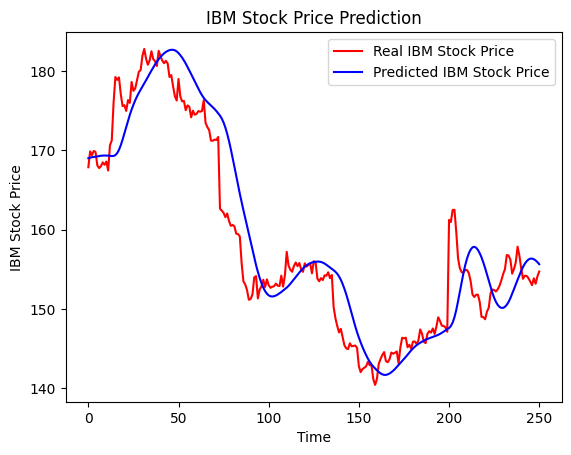

In [165]:
plot_predictions(test_set,lstm_predicted_stock_price)

In [166]:
return_rmse(test_set,lstm_predicted_stock_price)

The root mean squared error is 4.329638911537309.


# Intreactive plot

In [167]:
len(test_set), len(predicted_stock_price), len(lstm_predicted_stock_price)

(251, 251, 251)

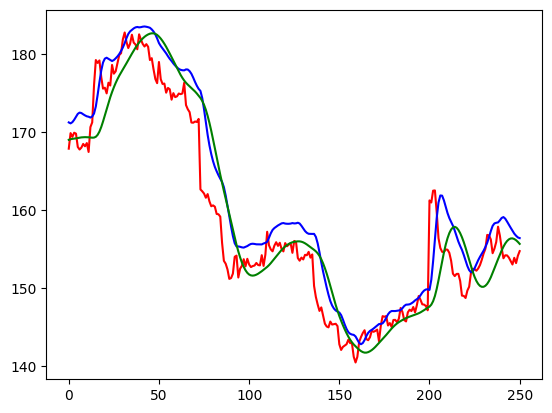

In [168]:
plt.plot(test_set, color='red',label='Real IBM Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted IBM Stock Price')
plt.plot(lstm_predicted_stock_price, color='green',label='Predicted IBM Stock Price')

In [169]:
def plot(dates, test_set, predicted_stock_price, lstm_predicted_stock_price):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dates, y=test_set.flatten(), name="Real IBM Stock Price"))
    fig.add_trace(go.Scatter(x=dates, y=predicted_stock_price.flatten(), name="Predicted IBM Stock Price (GRU)"))
    fig.add_trace(go.Scatter(x=dates, y=lstm_predicted_stock_price.flatten(), name="Predicted IBM Stock Price (LSTM)"))
    fig.update_layout(height=400, width=1000, title_text="IBM Stock Price Prediction", xaxis_rangeslider_visible=True)
    fig.show()

In [170]:
plot(dataset["High"]['2017':].index, test_set, predicted_stock_price, lstm_predicted_stock_price)